<a href="https://colab.research.google.com/github/lifewinning/MLTSA22_IBurrington/blob/main/HW5/IB_HW5_timeSeriesClustering_Revised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="red"> FBB I thought you would like this homework: there was so much to explore in the outliers! Some of the caribean island for exampls are outliers due to weather events, there are waves of emigrations that pick up simultaneously in Europe and the Carribean islands... lots of stories to tell. You did find an interesting story about Hungary, and you did all the required work tho. </font>

# Clustering analysis on population trends

## Imports

In [ ]:
import pandas as pd
from sklearn import preprocessing
import pylab as pl
from sklearn import cluster
import numpy as np
pl.rcParams['font.size'] = 18

In [ ]:
pip install xlrd==1.2.0

     |████████████████████████████████| 103 kB 12.1 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


# Data processing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/dsps

/content/drive/MyDrive/dsps


In [ ]:
#reading in the data
pop_df = pd.read_excel("SP.POP.TOTL?downloadformat=excel", usecols=[0] + list(range(4,100)), skiprows=3).set_index("Country Name")

/usr/local/lib/python3.7/dist-packages/pandas/io/excel/_base.py:1292: FutureWarning: Defining usecols with out of bounds indices is deprecated and will raise a ParserError in a future version.
  **kwds,


In [ ]:
# remove NAs
pop_df_clean = pop_df.dropna(axis=1, how="all").dropna(axis=0, how="any")

In [ ]:
# looking a little at the data
pop_df_clean.shape

(262, 61)

In [ ]:
pop_df_clean.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,57702.0,58044.0,58377.0,58734.0,...,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0
Africa Eastern and Southern,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,152752671.0,156876454.0,161156430.0,165611760.0,...,532760424.0,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0
Afghanistan,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,10174840.0,10399936.0,10637064.0,10893772.0,...,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
Africa Western and Central,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,109701811.0,112195950.0,114781116.0,117468741.0,...,360285439.0,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0
Angola,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,5781305.0,5774440.0,5771973.0,5803677.0,...,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0


In [ ]:
pop_df_clean.tail()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,,,,,,,,,,,,,,,,,,,,,
Kosovo,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,1106000.0,1135000.0,1163000.0,1191000.0,...,1791000.0,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1775378.0
"Yemen, Rep.",5315351.0,5393034.0,5473671.0,5556767.0,5641598.0,5727745.0,5816241.0,5907873.0,6001858.0,6097042.0,...,23807586.0,24473176.0,25147112.0,25823488.0,26497881.0,27168210.0,27834811.0,28498683.0,29161922.0,29825968.0
South Africa,17099836.0,17524533.0,17965733.0,18423157.0,18896303.0,19384838.0,19888259.0,20406863.0,20942147.0,21496075.0,...,52003759.0,52832659.0,53687125.0,54544184.0,55386369.0,56207649.0,57009751.0,57792520.0,58558267.0,59308690.0
Zambia,3070780.0,3164330.0,3260645.0,3360099.0,3463211.0,3570466.0,3681953.0,3797877.0,3918872.0,4045740.0,...,14023199.0,14465148.0,14926551.0,15399793.0,15879370.0,16363449.0,16853608.0,17351714.0,17861034.0,18383956.0
Zimbabwe,3776679.0,3905038.0,4039209.0,4178726.0,4322854.0,4471178.0,4623340.0,4779825.0,4941901.0,5111326.0,...,12894323.0,13115149.0,13350378.0,13586710.0,13814642.0,14030338.0,14236599.0,14438812.0,14645473.0,14862927.0


In [ ]:
# standardizing the data
pop_standard = preprocessing.scale(pop_df_clean, axis=1)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:236: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  "Numerical issues were encountered "


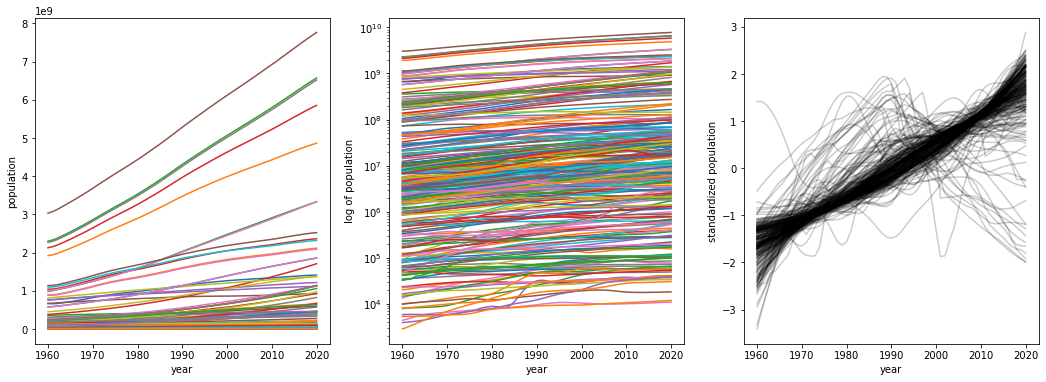

In [ ]:
# looking at the data
fig, ax = pl.subplots(1,3, figsize=(18,6))
pop_df_clean.T.plot(legend=False, ax=ax[0])
pop_df_clean.T.plot(legend=False, logy=True, ax=ax[1])
ax[2].plot(pop_standard.T, color="k", alpha=0.2)

ax[0].set_xlabel("year")
ax[0].set_ylabel("population")
ax[1].set_xlabel("year")
ax[1].set_ylabel("log of population")
ax[2].set_xlabel("year")
ax[2].set_ylabel("standardized population")
ax[2].set_xticks(range(0,70,10))
ax[2].set_xticklabels(["%d"%i for i in range(1960, 2030, 10)]);

Fig. 1: a plot of a population time series covering 1960-2020 (left), the same data with log y (center), the same data standardized by subtracting the mean and dividing by the standard deviation. Although the left plot suggests a general upward trend, it's hard to see outliers with this much data. The log-y plot shows us a little more information, but it's only with the standardized data that it's really clear that many places didn't have simple linear growth but actually fell a bit.



<font color="red"> FBB good</font>

# An elbow plot to figure out ideal cluster _n_ (results inconclusive!)

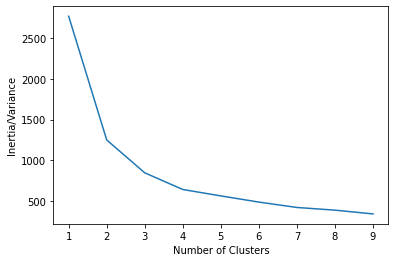

In [ ]:
# not sure if this is "variance" or "inertia"--slides use variance, sklearn docs say inertia, I think it's the same thing?
inertia = []
for i in range(1,10): 
  cl = cluster.k_means(pop_standard, i)  
  inertia.append(cl[2])

pl.plot(range(1,10), inertia)
pl.xlabel("Number of Clusters")
pl.ylabel("Inertia/Variance");

Figure 2: "Elbow plot" of k-means clustering of our time series. The y axis shows the sum of squared distances to the closest centroid (scikit calls this "inertia", Fed called it "variance"). The point where inertia/variance dramatically drops in an elbow plot is recommended as the preferred number of clusters; this line has a bit too much of a gradual descent to make an effective recommendation. I'm just going to keep using 4 because that's what we used in class. 

<font color="red"> FBB good</font>

# Plotting  clusters from the data

In [ ]:
# time for a k-means cluster!!
c = cluster.k_means(pop_standard, 4)

In [ ]:
for i in range(4):
  print ("total items in cluster {:d}: {:d}".format(
      i+1, np.sum(c[1] == i)))

total items in cluster 1: 116
total items in cluster 2: 10
total items in cluster 3: 26
total items in cluster 4: 110


In [ ]:
pop_df_clean.shape

(262, 61)

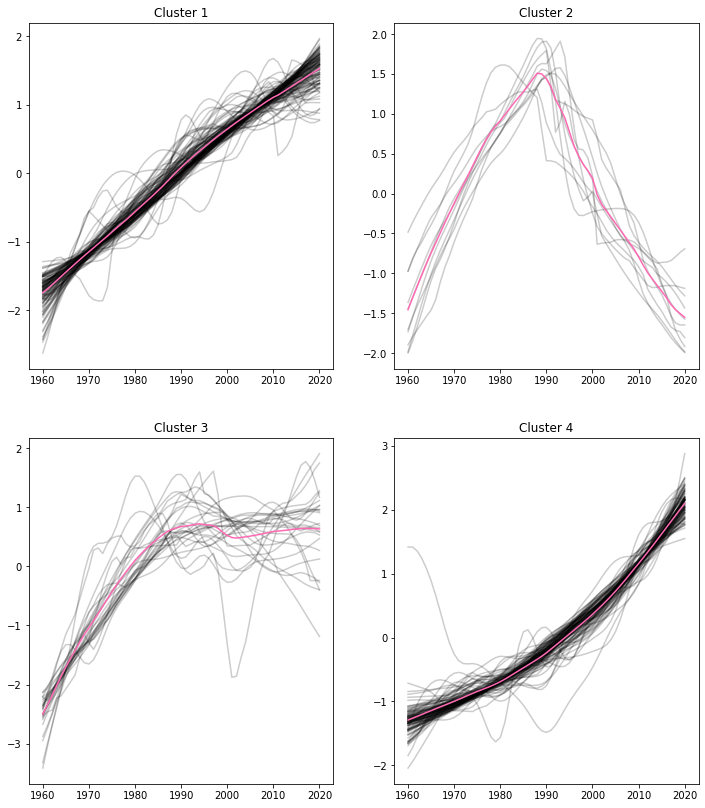

In [ ]:
# probably should have done this with a loop but it's not a lot of data
# adding year ticks in subplots: https://stackoverflow.com/questions/19626530/python-xticks-in-subplots
fig,ax = pl.subplots(2,2, figsize=(12,14))


ax[0,0].set_title("Cluster 1")
ax[0,0].set_xticks(range(0,70,10))
ax[0,0].set_xticklabels(["%d"%i for i in range(1960, 2030, 10)]);
ax[0,0].plot(pop_standard[c[1] == 0 ].T, "k", alpha=0.2);
ax[0,0].plot(c[0][0], color="hotpink")

ax[0,1].set_title("Cluster 2")
ax[0,1].set_xticks(range(0,70,10))
ax[0,1].set_xticklabels(["%d"%i for i in range(1960, 2030, 10)]);
ax[0,1].plot(pop_standard[c[1] == 1 ].T, "k", alpha=0.2);
ax[0,1].plot(c[0][1], color="hotpink")

ax[1,0].set_title("Cluster 3")
ax[1,0].set_xticks(range(0,70,10))
ax[1,0].set_xticklabels(["%d"%i for i in range(1960, 2030, 10)]);
ax[1,0].plot(pop_standard[c[1] == 2 ].T, "k", alpha=0.2);
ax[1,0].plot(c[0][2], color="hotpink")

ax[1,1].set_title("Cluster 4")
ax[1,1].set_xticks(range(0,70,10))
ax[1,1].set_xticklabels(["%d"%i for i in range(1960, 2030, 10)]);
ax[1,1].plot(pop_standard[c[1] == 3 ].T, "k", alpha=0.2);
ax[1,1].plot(c[0][3], color="hotpink")

Figure 3: Results of using k-means clustering on the standardized data seen in Figure 1. The mean line for each cluster is visible in pink.

Cluster 1 is a a fairly linear upward trend with some outliers and cluster 4 a more curved upward trend. Cluster 2 and cluster 4 have fewer time series; 2 rises steadily before a big drop in the 1990s whereas the countries in 3 kind of hit a plateau around the 1990s. 

<font color="red"> FBB ok</font>

# Identifying the countries in the smallest clusters

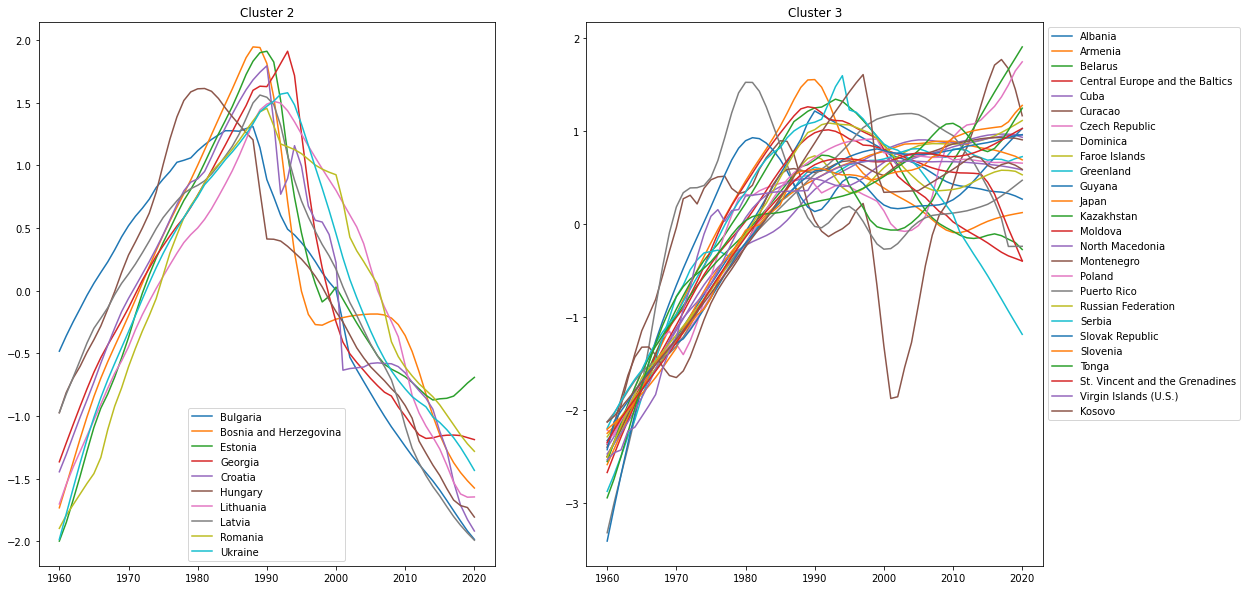

In [ ]:
fig,ax = pl.subplots(1,2, figsize=(18,10))

ax[0].set_title("Cluster 2")
ax[0].set_xticks(range(0,70,10))
ax[0].set_xticklabels(["%d"%i for i in range(1960, 2030, 10)]);
ax[0].plot(pop_standard[c[1] == 1 ].T);
ax[0].legend(labels=pop_df_clean.loc[c[1] == 1].index)

ax[1].set_title("Cluster 3")
ax[1].set_xticks(range(0,70,10))
ax[1].set_xticklabels(["%d"%i for i in range(1960, 2030, 10)]);
ax[1].plot(pop_standard[c[1] == 2 ].T);
# placing legend method via https://www.delftstack.com/howto/matplotlib/how-to-place-legend-outside-of-the-plot-in-matplotlib/
ax[1].legend(labels=pop_df_clean.loc[c[1] == 2].index, bbox_to_anchor=(1.0, 1.0), loc='upper left')


Figure 4: Clusters 2 and 3 from Fig. 3, with individual countries in each plot identified in legend. Cluster 2 has a lot of former Soviet republics and Balkan countries; all of these countries seeing population decreases after the collapse of the Soviet Union and then the war over Kosovo makes sense. According to [one source](https://hungarytoday.hu/historic-analysis-the-demographic-downfall-of-hungary/) the shifts and decline in the Hungarian population in the 1980s partly may have to do with changes in abortion laws in the country?

 <font color="red"> FBB .... yeah.... interesting: in fact Hungary has roughlty the same trend as the countries in the clusters but now quite : a time offset </font>

Cluster 3 has some former Soviet republics and Balkan countries (Slovak Republic, Serbia) but also some smaller Caribbean islands and coutries with smaller populations to start with. Japan is also included in here; that countriy had a "baby boom" period in the period following World War II so the subsequent population drop might reflect more of the baby boom generation dying and fewer people in subsequent generations having kids.

<font color="red"> FBB ok</font>